In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize  as opt
import scipy.ndimage as ndi

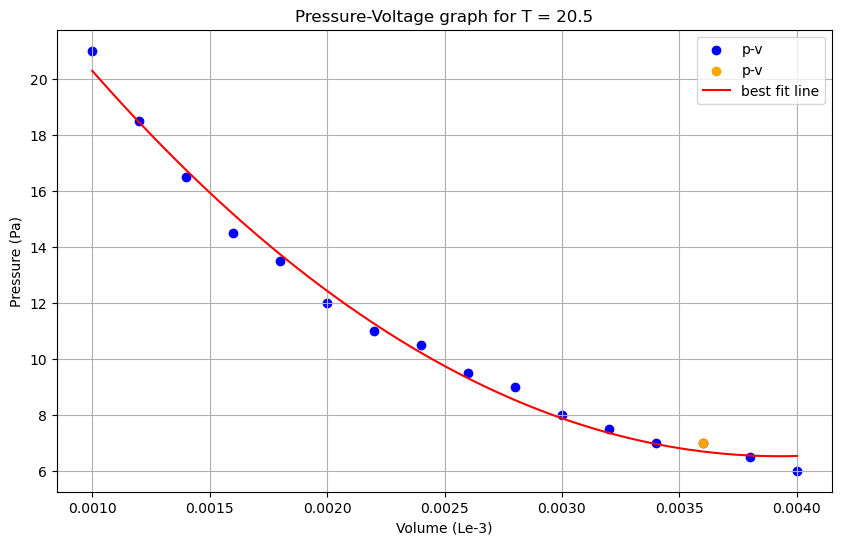

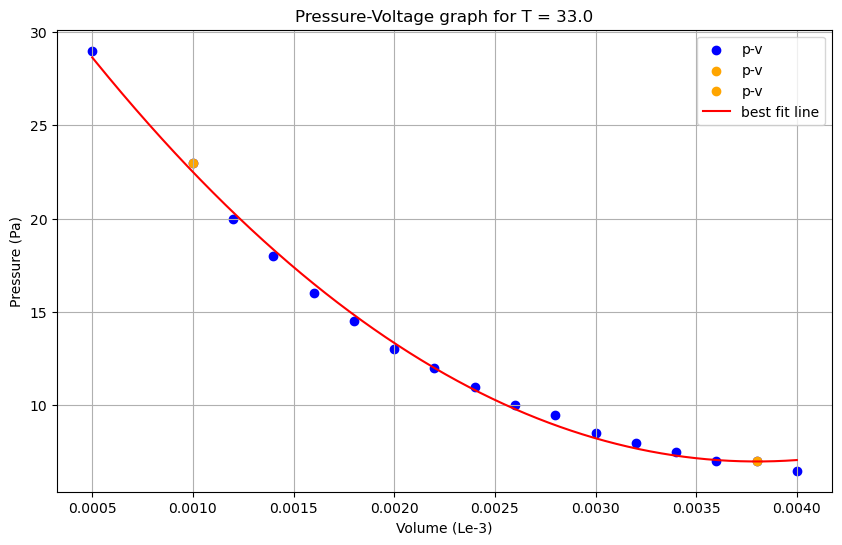

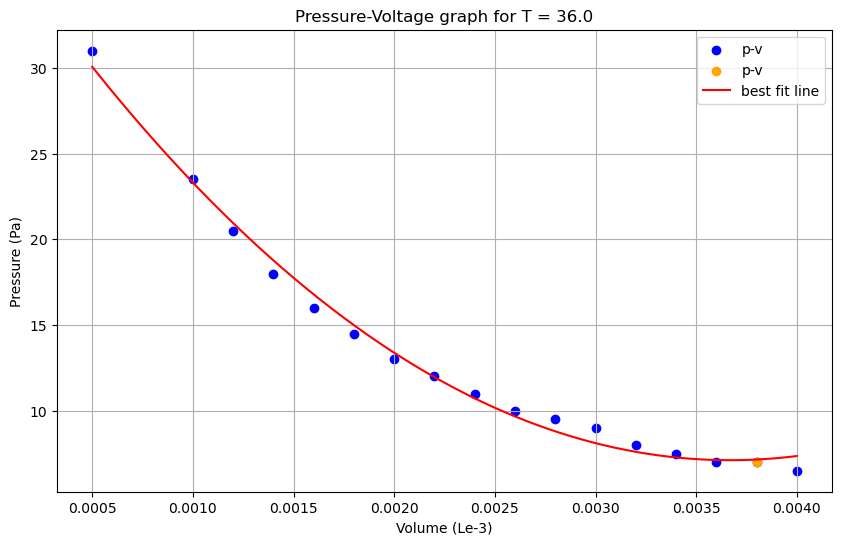

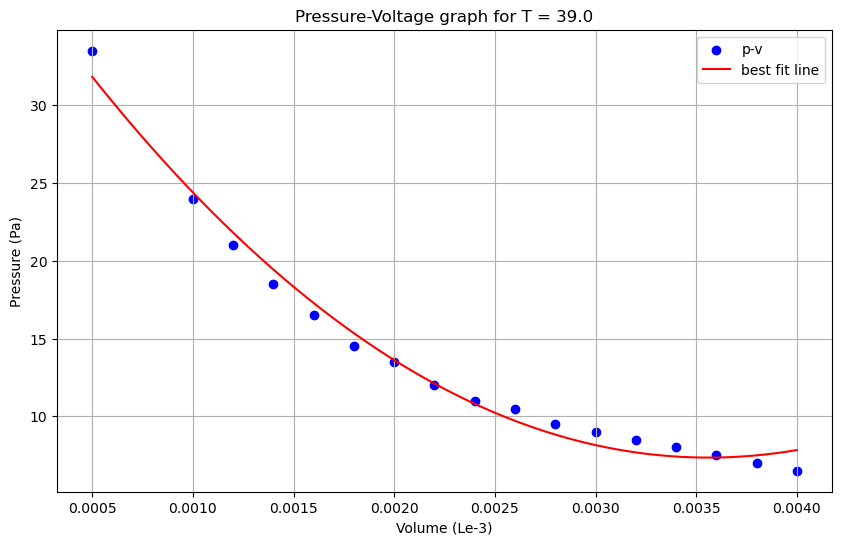

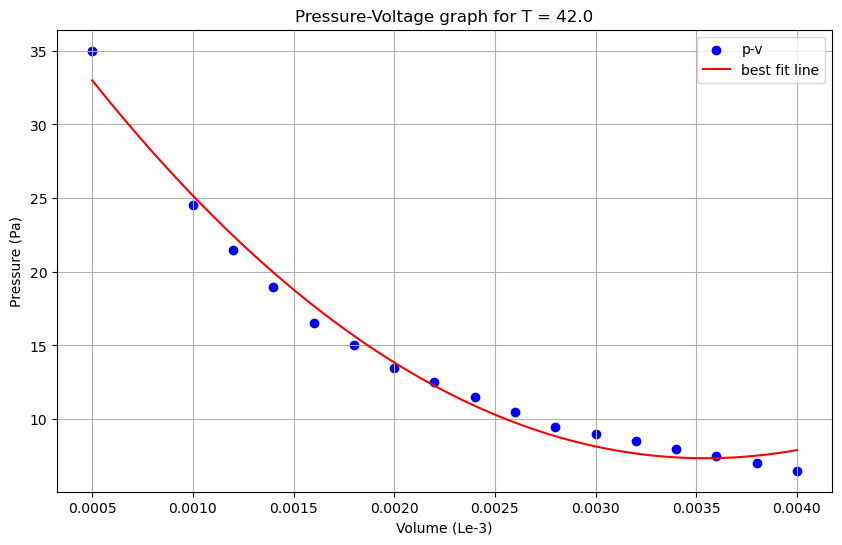

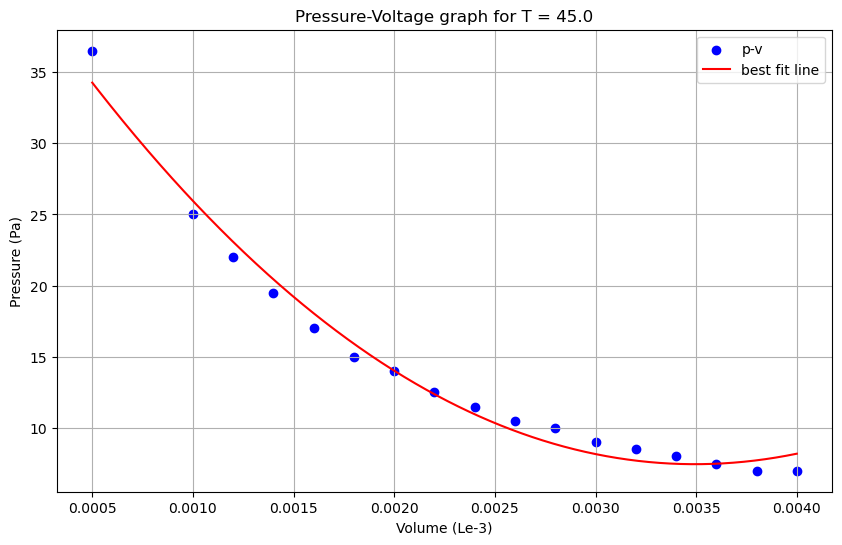

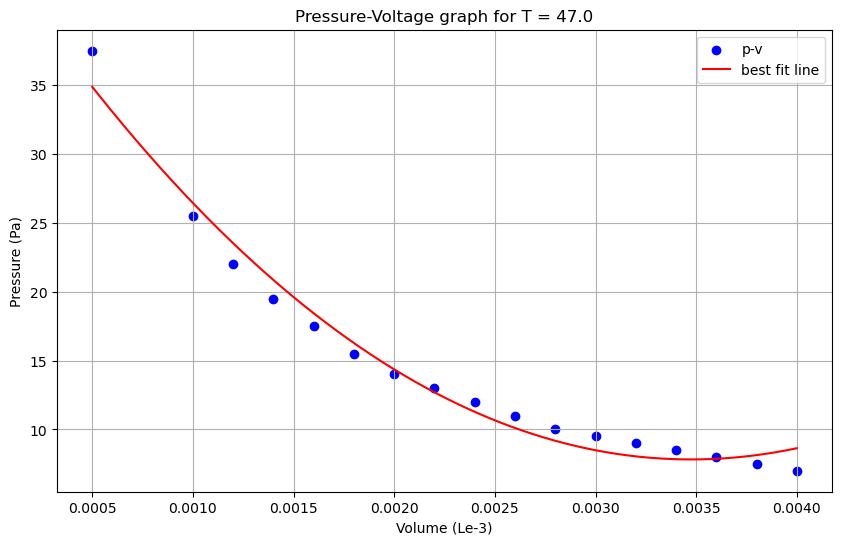

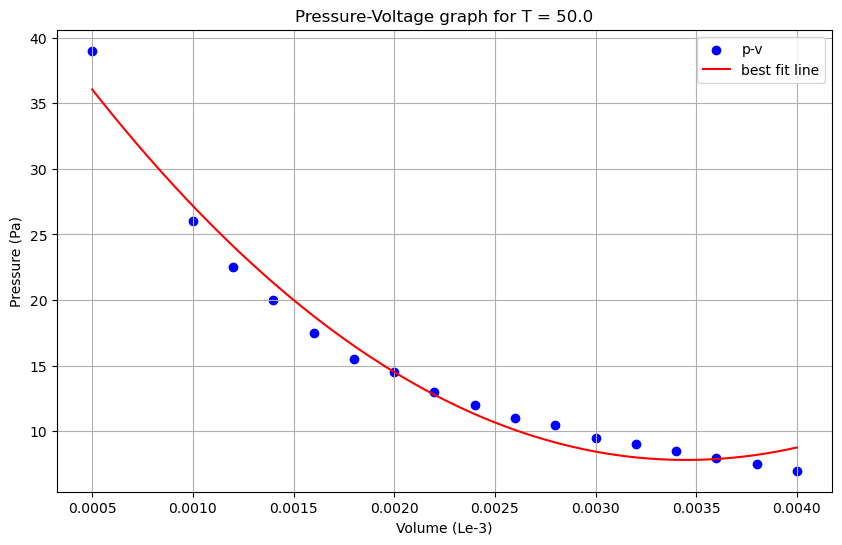

In [ ]:
sheets = ["Sheet1","Sheet2","Sheet3","Sheet4","Sheet5","Sheet6","Sheet7","Sheet8"]
temperature = np.array([20.5,33,36,39,42,45,47,50])

datas = np.array([])
p_list = []
v_list = []

for i,p in enumerate(sheets):
    data = pd.read_excel('Data_modified.xlsx',p)
    datas = np.append(datas,data)
    p = []
    v = []
    for g in data['Pressure(E5)Pa']:
        p.append(g)
    for g in data['Volume(E-03)L']:
        v.append(g)
    p_list.append(p)
    v_list.append(v)



R = 8.314

for i,p in enumerate(sheets):
    T = temperature[i] + 273.15
    def real_gas(V,a,b,n,m):
        return (R*T)/(((V+n))-b) - (a/(((V+n))**2)) + m
    
    p_element = np.array(p_list[i]) 
    v_element = np.array(v_list[i]) * 1e-3

    first_deriv = np.gradient(p_element,v_element)
    second_deriv = np.gradient(first_deriv,v_element)
    second_deriv_smooth = ndi.gaussian_filter1d(second_deriv,sigma=1)
    inflection_indicies = np.where(np.diff(np.sign(second_deriv_smooth)))[0]
    deriv_changing = np.argmax(np.abs(np.diff(first_deriv)))

    popt, pcov = opt.curve_fit(real_gas,v_element,p_element,maxfev=150000)

    points= 1000
    v_smooth = np.linspace(v_element[0],v_element[-1],points)

    fit_line = real_gas(v_smooth,*popt)

    plt.figure(figsize=(10, 6))
    plt.title(f"Pressure-Voltage graph for T = {temperature[i]}")

    """
    for m,n in enumerate(p_element):
        if p_element[m-1] == p_element[m]:
            p = [p_element[m] for i in range(points)]
            plt.plot(v_smooth,p,color="green")

    """
    

    plt.scatter(v_element, p_element, label=r"p-v", color='blue',)

    plt.plot(v_smooth,fit_line,label="best fit line",color="red")
    plt.grid(True)
    plt.xlabel("Volume (Le-3)")
    plt.ylabel("Pressure (Pa)")
    plt.legend()
    plt.show()
